
# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Prinicpal Components (Analysis)

_Author:_ Timothy Book, General Assembly DC

## Agenda:
1. **What** problem(s) will PCA solve?
1. **How** does it solve these problems?
1. **When** are some times when PCA is used?

# **What** problem(s) does PCA solve?
PCA is an **unsupervised learning** method. So, it is often used to **preprocess** data before it goes into a supervised learning method. Specifically, it can be used to "solve" the following common problems:

1. Too many columns ($p \gg n$)
1. Multicollinearity
1. Usually, both of the above at the same time

# **How** does it work?
Suppose you have $p$ feature columns. The **first principal component** is a linear combination of all $p$ columns that accounts for the **maximum variance** among them.  That is,

$$z_1 = c_1x_1 + c_2x_2 + \cdots + c_px_p$$

The **second principal component** is another linear combination of the $p$ features that accounts for the maximum of the _remaining_ variance after the first. Another condition is that the second PC must be **orthogonal (perpendicular)** to the first.

The **third principal component** maximizes the remaining variance while being orthogonal (read: _independent_) to the first two, and so on.

# **Geometric** interpretation:
Suppose you have two $x$-variables that look like this:

<img src="imgs/p1.png" width="500px"/>

$x_1$ and $x_2$ are clearly correlated. So any $y$-variable we try to predict will have _multicollinearity_. So should we only pick one? How do we know which to pick? What if, instead of two $x$-variables, we have many? And their correlations are a little weaker? What do we do?!

The geometric interpretation is the act of **rotating** axes to **decorrelate** your $x$-variables.

<img src="imgs/p2.png" width="500px"/>

## **When** is this used IRL?
In class, I frequently give the example of working with **genomic data**. It is expensive to gather rows, since genetic testing is difficult. But once you sample sommeone, you typically collect thousands of genetic markers (columns). However, only a few of them are significant, and many of them are correlated. Biostatisticians will often only use the first few PCs in their analyses.

From a more data sciency perspective, PCA is often performed on image data to get low-resolution versions of images so they are easier to work with for other types of analyses. PCA is very heavily employed in **image processing** for this reason.

# **Example 1 in Python**: Leggooooo

In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
xvars = ['temp', 'atemp', 'humidity', 'holiday', 'workingday', 'windspeed']
X = df[xvars]
y = df['count']

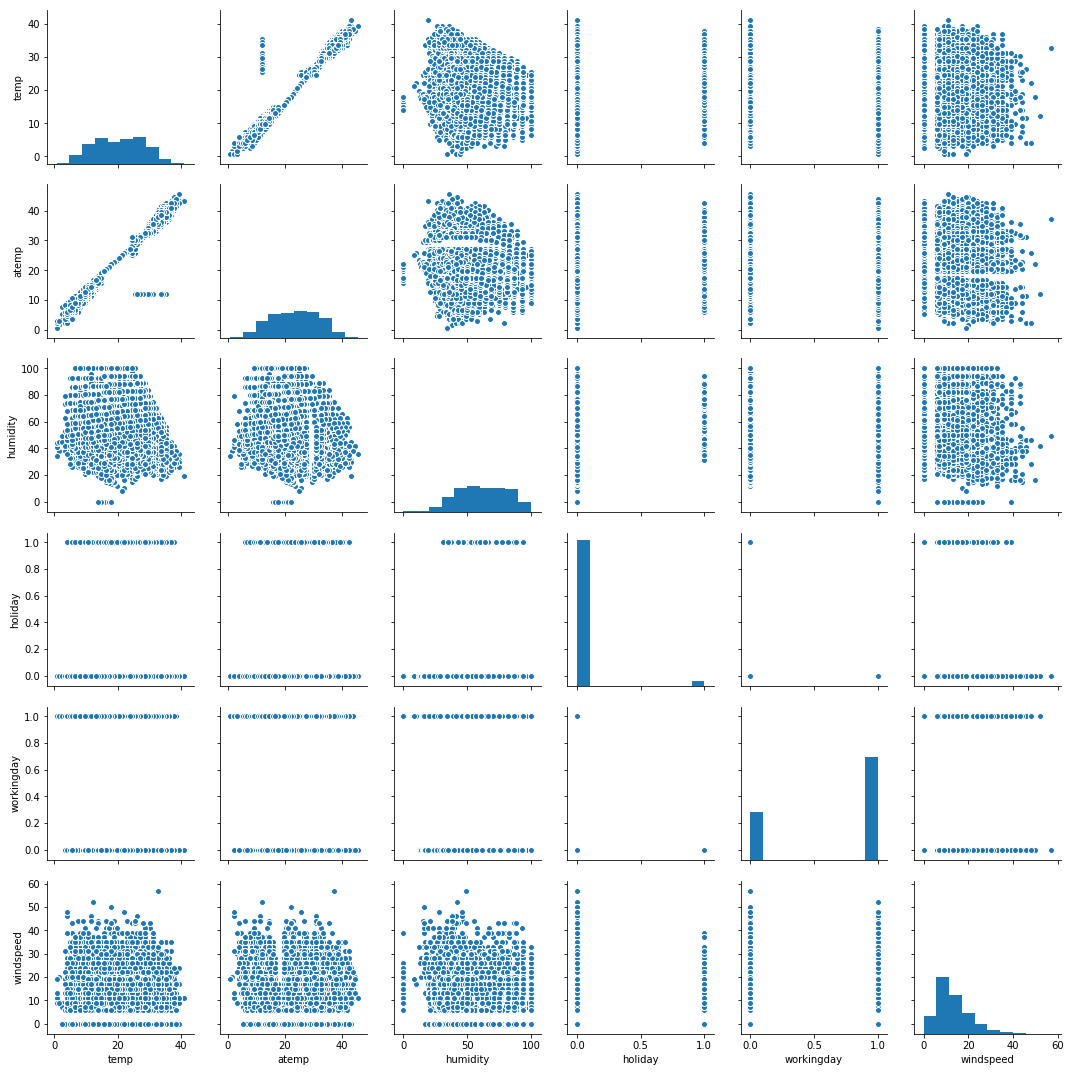

In [5]:
sns.pairplot(X)

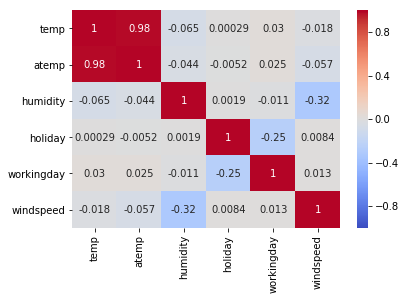

In [6]:
sns.heatmap(X.corr(), cmap='coolwarm', vmin=-1, annot=True)

In [9]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [10]:
pc = PCA(n_components=6)
X_pc = pc.fit_transform(X_sc)

In [13]:
X_pc[:10]

array([[-1.78691987, -1.88406241,  0.62661416, -1.12587643, -0.4048749 ,
        -0.1143711 ],
       [-1.9207352 , -1.84384389,  0.62558036, -1.12940255, -0.45129527,
        -0.12567772],
       [-1.9207352 , -1.84384389,  0.62558036, -1.12940255, -0.45129527,
        -0.12567772],
       [-1.76591727, -1.6661897 ,  0.65160454, -1.1560429 , -0.62341545,
        -0.11650537],
       [-1.76591727, -1.6661897 ,  0.65160454, -1.1560429 , -0.62341545,
        -0.11650537],
       [-1.91488972, -1.14118042,  0.70711104, -1.11049315, -0.11531466,
        -0.00929375],
       [-1.9207352 , -1.84384389,  0.62558036, -1.12940255, -0.45129527,
        -0.12567772],
       [-2.07863798, -2.05783253,  0.59540554, -1.0977424 , -0.24272718,
        -0.13491157],
       [-1.76591727, -1.6661897 ,  0.65160454, -1.1560429 , -0.62341545,
        -0.11650537],
       [-1.2209858 , -1.71808277,  0.66820609, -1.15700577, -0.54705324,
        -0.07151163]])

In [14]:
pc.explained_variance_ratio_

array([0.3322533 , 0.22003865, 0.20805805, 0.12492588, 0.11236079,
       0.00236332])

In [15]:
for k in range(1, 7):
    sc = StandardScaler()
    X_sc = sc.fit_transform(X)
    pc = PCA(n_components=k)
    X_pc = pc.fit_transform(X_sc)
    lm = LinearRegression()
    lm.fit(X_pc, y)
    print(lm.score(X_pc, y))

0.1636738108124921
0.2222219626254701
0.22367484026807596
0.22462808490713237
0.24327952084701743
0.24349407377158472


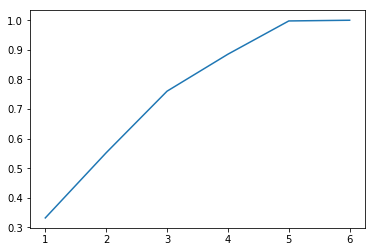

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
pc = PCA(n_components=6)
pc.fit(X_sc)
plt.plot(range(1, 7), np.cumsum(pc.explained_variance_ratio_))
# cumsum will add all those explained variance ratios, so we can see when variables stop adding anything to model 

In [20]:
pc.explained_variance_ratio_

array([0.3322533 , 0.22003865, 0.20805805, 0.12492588, 0.11236079,
       0.00236332])

Our preprocessing is now starting to get pretty complicated. Luckily, `sklearn` gives us a way to smash it all together in a data science "pipeline."

In [21]:
# must start with any transform, transforming the data (in this case standard scaler terandform)
# ends with an estimator 
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('pc', PCA(n_components=2)),
    ('lm', LinearRegression())
])

In [22]:
pipe.fit(X, y)
pipe.score(X, y)

0.2222219626254699

## **Example 2**: Speed Dating Data

In [23]:
dating = pd.read_csv('data/speed_dating.csv').dropna()

In [24]:
dating.shape

(314, 29)

In [25]:
dating.columns

Index(['subject_id', 'wave', 'like_sports', 'like_tvsports', 'like_exercise',
       'like_food', 'like_museums', 'like_art', 'like_hiking', 'like_gaming',
       'like_clubbing', 'like_reading', 'like_tv', 'like_theater',
       'like_movies', 'like_concerts', 'like_music', 'like_shopping',
       'like_yoga', 'subjective_attractiveness', 'subjective_sincerity',
       'subjective_intelligence', 'subjective_fun', 'subjective_ambition',
       'objective_attractiveness', 'objective_sincerity',
       'objective_intelligence', 'objective_fun', 'objective_ambition'],
      dtype='object')

In [26]:
dating.head()

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
232,234,10,5.0,3.0,10.0,10.0,9.0,5.0,2.0,1.0,...,7.0,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0
233,235,10,1.0,3.0,3.0,10.0,9.0,10.0,2.0,1.0,...,6.0,9.0,8.0,9.0,9.0,6.0,9.0,9.0,9.0,9.0
234,236,10,9.0,6.0,3.0,7.0,9.0,9.0,7.0,1.0,...,7.0,9.0,8.0,10.0,8.0,8.0,9.0,8.0,10.0,9.0
235,237,10,1.0,1.0,10.0,7.0,8.0,9.0,9.0,1.0,...,8.0,10.0,8.0,7.0,8.0,8.0,10.0,9.0,7.0,10.0
236,238,10,8.0,5.0,8.0,8.0,10.0,10.0,8.0,2.0,...,10.0,9.0,9.0,10.0,8.0,9.0,9.0,9.0,9.0,9.0


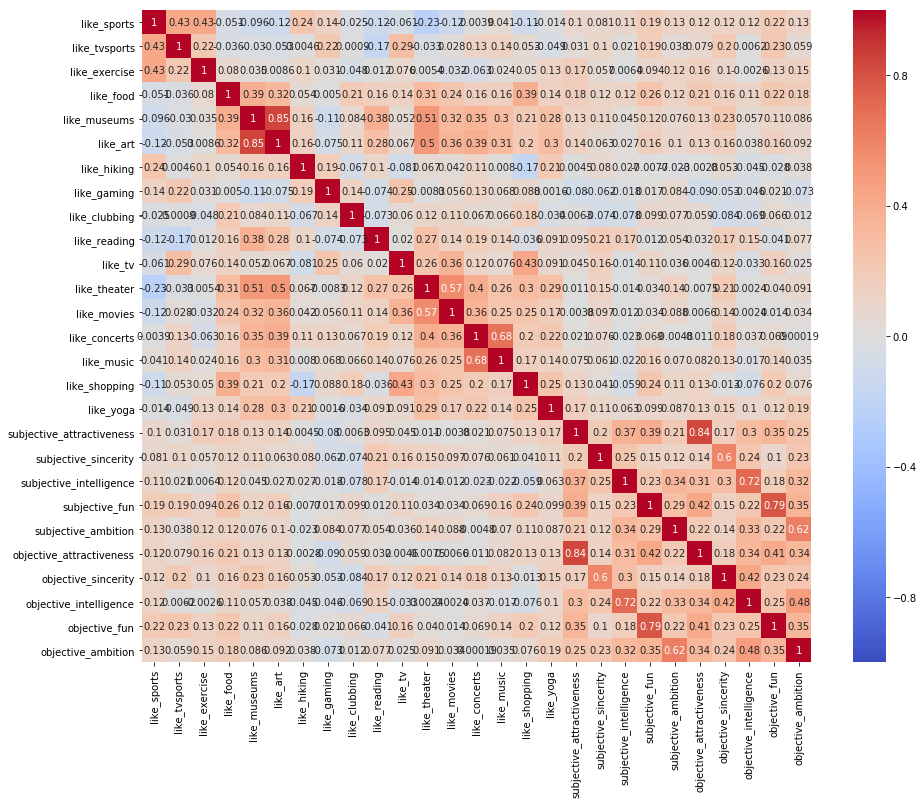

In [36]:
plt.figure(figsize=(15, 12))
dating_corr = dating.iloc[:, dating.columns.str.startswith('like_')].corr()
sns.heatmap(dating.iloc[:, 2:].corr(), cmap='coolwarm', vmin=-1, annot=True)

In [37]:
dating_corr.unstack()

like_sports    like_sports      1.000000
               like_tvsports    0.427847
               like_exercise    0.428046
               like_food       -0.050880
               like_museums    -0.095666
               like_art        -0.115536
               like_hiking      0.235832
               like_gaming      0.142696
               like_clubbing   -0.024593
               like_reading    -0.121606
               like_tv         -0.061311
               like_theater    -0.229859
               like_movies     -0.117703
               like_concerts    0.003881
               like_music       0.040725
               like_shopping   -0.108132
               like_yoga       -0.013801
like_tvsports  like_sports      0.427847
               like_tvsports    1.000000
               like_exercise    0.221323
               like_food       -0.035642
               like_museums    -0.030048
               like_art        -0.053033
               like_hiking      0.004612
               l

In [38]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('pc', PCA()),
    ('lm', LinearRegression())
])

X = dating.iloc[:, 2:].drop('objective_attractiveness', axis=1)
y = dating['objective_attractiveness']

In [39]:
X.shape

(314, 26)

In [40]:
pipe.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('pc',
   PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False)),
  ('lm',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))],
 'sc': StandardScaler(copy=True, with_mean=True, with_std=True),
 'pc': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'lm': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'pc__copy': True,
 'pc__iterated_power': 'auto',
 'pc__n_components': None,
 'pc__random_state': None,
 'pc__svd_solver': 'auto',
 'pc__tol': 0.0,
 'pc__whiten': False,
 'lm__copy_X': True,
 'lm__fit_intercept': True,
 'lm__n_jobs': 1,
 'lm__normalize': False}

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [43]:
rsq_list = []
for k in range(1, X.shape[1] + 1):
    pipe.set_params(pc__n_components=k)
    pipe.fit(X_train, y_train)
    rsq = pipe.score(X_test, y_test)
    rsq_list.append(rsq)
    print(f"k = {k}: Rsq = {rsq}")

k = 1: Rsq = 0.21010347905842172
k = 2: Rsq = 0.2100966128995937
k = 3: Rsq = 0.20478918134749202
k = 4: Rsq = 0.2894664715877191
k = 5: Rsq = 0.2888224944805149
k = 6: Rsq = 0.2898530914086902
k = 7: Rsq = 0.33145584649238746
k = 8: Rsq = 0.3641795100395583
k = 9: Rsq = 0.3647742492259868
k = 10: Rsq = 0.36028895699274244
k = 11: Rsq = 0.43671806561665816
k = 12: Rsq = 0.4811584631428747
k = 13: Rsq = 0.5505065819568842
k = 14: Rsq = 0.5569209482409689
k = 15: Rsq = 0.6719274320089739
k = 16: Rsq = 0.6859746801855442
k = 17: Rsq = 0.6897159709049759
k = 18: Rsq = 0.7094411296252443
k = 19: Rsq = 0.7340256734519846
k = 20: Rsq = 0.7703759316292426
k = 21: Rsq = 0.7789290548559141
k = 22: Rsq = 0.780370468978971
k = 23: Rsq = 0.7881666649589448
k = 24: Rsq = 0.7892298364937367
k = 25: Rsq = 0.7888818278389188
k = 26: Rsq = 0.7872364896024553


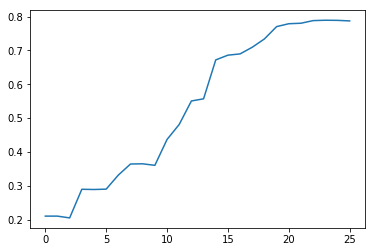

In [44]:
plt.plot(rsq_list)

In [46]:
X_sc = StandardScaler().fit_transform(X)
pc = PCA(n_components=26)

<function sklearn.pipeline.Pipeline.predict(self, X)>